# Natural Language Processing with Disaster Tweets
https://www.kaggle.com/competitions/nlp-getting-started/data

# Read data

In [1]:
from typing import Dict, List
import pandas as pd
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\CHAMBERY
[nltk_data]     Matthieu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CHAMBERY
[nltk_data]     Matthieu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('data/disaster_tweets/train.csv', index_col='id')
data.shape

(7613, 4)

In [3]:
def random_tweet(df: pd.DataFrame = data) -> Dict:
    return df.sample().to_dict(orient='records')[0]

# Exploratory Data Analysis

In [4]:
data_duplicated = data[data.duplicated(subset='text')]
n_rows = data.shape[0]
n_rows_duplicated = data_duplicated.shape[0]
print(f"{n_rows} rows with {n_rows_duplicated} duplicated text")

7613 rows with 110 duplicated text


In [5]:
data.drop_duplicates(subset='text', inplace=True)
data.shape

(7503, 4)

In [6]:
{col: data[data[col].isna()].shape[0] for col in data.columns}

{'keyword': 56, 'location': 2482, 'text': 0, 'target': 0}

In [7]:
columns=['keyword','location','target']
for col in columns:
    df_col_stats = data.groupby(by=col).text.count().sort_values(ascending=False).describe()
    print(f"For column {col}: {df_col_stats['count']:0.0f} uniques values, with an average of {df_col_stats['mean']:0.1f} corresponding tweets (min : {df_col_stats['min']:0.0f}, max: {df_col_stats['max']:0.0f}, std: {df_col_stats['std']:0.1f})\n")

For column keyword: 221 uniques values, with an average of 33.7 corresponding tweets (min : 9, max: 45, std: 4.8)

For column location: 3327 uniques values, with an average of 1.5 corresponding tweets (min : 1, max: 104, std: 3.0)

For column target: 2 uniques values, with an average of 3751.5 corresponding tweets (min : 3198, max: 4305, std: 782.8)



In [8]:
n_tweets = data['target'].shape[0]
n_disasters_tweets = data[data['target'] == 1].shape[0]
print(f"In the {n_tweets} tweets, {n_disasters_tweets} ({100*n_disasters_tweets/n_tweets:0.2f}%) are about real disasters.")

In the 7503 tweets, 3198 (42.62%) are about real disasters.


In [9]:
data['text_len'] = data['text'].apply(len)
data['text_len'].describe()

count    7503.000000
mean      100.880581
std        33.819457
min         7.000000
25%        77.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_len, dtype: float64

array([[<Axes: title={'center': 'text_len'}>]], dtype=object)

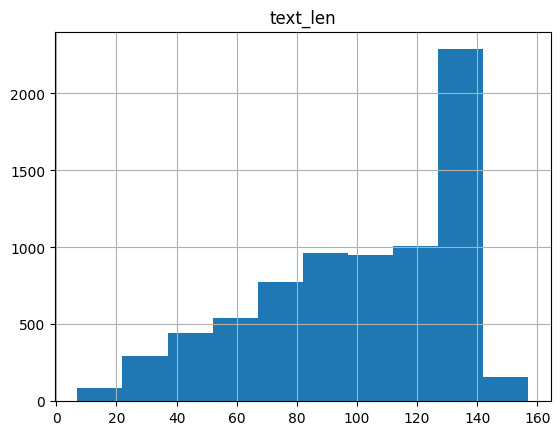

In [10]:
data.hist(column='text_len')

# Text processing

In [11]:
TOKENIZER = nltk.TweetTokenizer()
REGEX = r'\w{3,}'
STOPWORDS = nltk.corpus.stopwords.words('english')
STEMMER = nltk.stem.snowball.EnglishStemmer()

In [12]:
def tokenize_text(txt: str, tokenizer=TOKENIZER) -> List[str]:
    return tokenizer.tokenize(text=txt.lower())

In [13]:
def process_words(words: List[str], regex=REGEX, stopwords=STOPWORDS, stemmer=STEMMER) -> List[str]:
    return [stemmer.stem(word) for word in words if (re.match(regex, word) and
                                                     word not in stopwords)]

In [14]:
tweet = random_tweet()
tokens_raw = tokenize_text(txt=tweet['text'])
tokens = process_words(tokens_raw)
print(f"\"{tweet}\"\n\n"
      f"tokenized into :\n\n"
      f"{tokens_raw}\n\n"
      f"without stopwords & with stemming :\n\n"
      f"{tokens}\n\n")

"{'keyword': 'lava', 'location': nan, 'text': 'I lava you ?????? http://t.co/aeZ3aK1lRN', 'target': 0, 'text_len': 40}"

tokenized into :

['i', 'lava', 'you', '?', '?', '?', 'http://t.co/aez3ak1lrn']

without stopwords & with stemming :

['lava', 'http://t.co/aez3ak1lrn']




# Corpus analysis

In [15]:
corpus = {target: [] for target in data["target"].unique()}
for tweet in data.itertuples():
    corpus[tweet.target].extend(process_words(tokenize_text(tweet.text)))

In [16]:
freq_dist = {}
for target, tokens in corpus.items():
    freq_dist_target = nltk.FreqDist(tokens)
    print(f"Most commons tokens for {'disaster tweets' if target == 1 else 'other tweets'} :")
    print(freq_dist_target.most_common(15))
    print(f"Total of {len(freq_dist_target.keys())} different tokens with {len(freq_dist_target.hapaxes())} only appearing once\n")

    freq_dist[target] = freq_dist_target

Most commons tokens for disaster tweets :
[('fire', 263), ('bomb', 174), ('kill', 160), ('via', 119), ('crash', 113), ('california', 110), ('flood', 110), ('disast', 107), ('polic', 105), ('attack', 105), ('suicid', 104), ('peopl', 102), ('home', 102), ('famili', 102), ('train', 101)]
Total of 8334 different tokens with 5687 only appearing once

Most commons tokens for other tweets :
[('like', 304), ('get', 223), ('new', 170), ('one', 135), ('bodi', 116), ('love', 114), ('bag', 111), ('time', 103), ('scream', 100), ('video', 99), ('make', 99), ('see', 98), ('via', 98), ('day', 97), ('want', 97)]
Total of 9665 different tokens with 6419 only appearing once



(-0.5, 399.5, 199.5, -0.5)

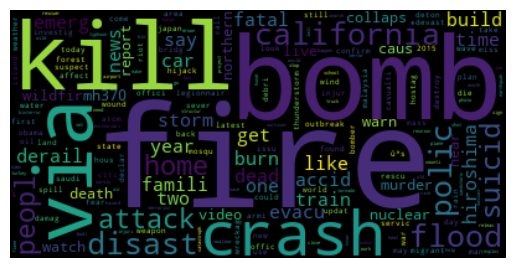

In [17]:
wordcloud_disaster = WordCloud().generate_from_frequencies(freq_dist[1])
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

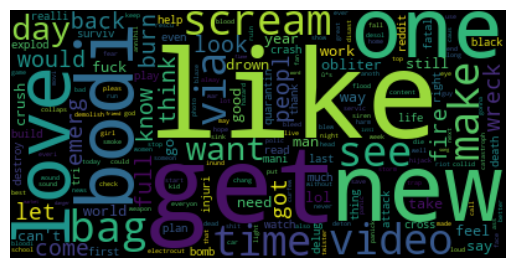

In [18]:
wordcloud_non_disaster = WordCloud().generate_from_frequencies(freq_dist[0])
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.axis("off")